In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

import MyLib
from MyLib import Data

%matplotlib inline


In [2]:
x_train = pd.read_csv('x_train.csv',sep=';')
y_train = pd.read_csv('y_train.csv',sep=';',names=['value'])
x_test = x_train = pd.read_csv('x_train.csv',sep=';')

data = Data(x_train,y_train)
data.scale()
data=Data(data.scaler.transform(x_test),data.y)

In [3]:
def cry(y):
    n_t = len([y==1])
    n_f = len([y==0])
    n = float(len(y))
    return n_t*n_t/n/n

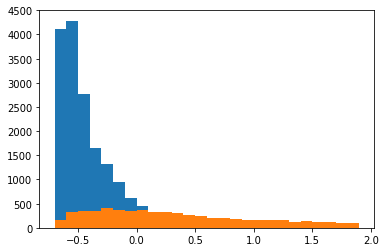

In [4]:
fals = plt.hist(data.X[:,3][data.y==0],bins = np.arange(-0.7,2,0.1))
tru  = plt.hist(data.X[:,3][data.y==1],bins = np.arange(-0.7,2,0.1))
#print fals,tru


In [14]:
from sklearn.ensemble import RandomForestClassifier


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars


59 60


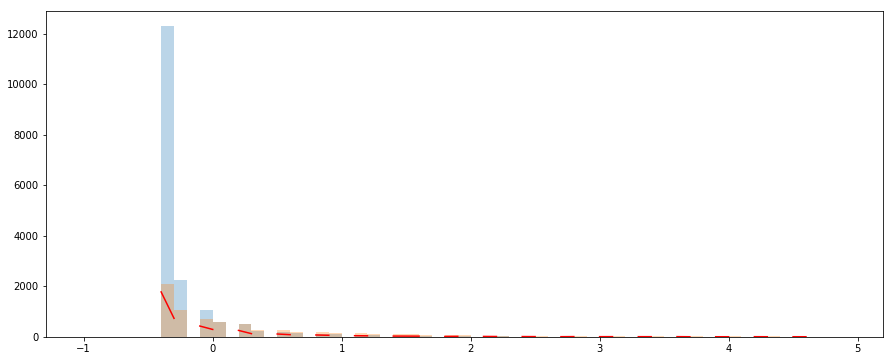

In [50]:
plt.figure(figsize=(15,6))

f_num=2

b = np.arange(-1,5,0.1)
fals = plt.hist(data.X[:,f_num][data.y==0],bins = b,alpha = 0.3)
tru  = plt.hist(data.X[:,f_num][data.y==1], bins = b,alpha=0.3)

a = []
#print fals[0]
for i in range(len(fals[0])):
    s = fals[0][i]+tru[0][i]
    cr = fals[0][i]*tru[0][i]/s
    a.append(cr)

plt.plot(fals[1][:-1],np.asarray(a),'r-')

print len(a)  , len(fals[1])


In [5]:
def cry(X,y,num=100):
    xmax = np.amax(X)
    xmin =  np.amin(X)
    rang = (xmin,xmax)
    
    tru =np.histogram(X[y==1],bins=num,range=rang)[0]
    fals = np.histogram(X[y==0],bins=num,range=rang)[0]
    #print tru
    res = []
    for i in range(num-1):
        s = fals[i]+tru[i]
        if(s==0):
            res.append(0)
        else:
            cr = fals[i]*tru[i]/s
            res.append(cr)
    return sum(res)

In [39]:
def cry_mat(X,y):
    f = np.asarray(X[y==0])
    tr = np.asarray(X[y==1])
    a= f.mean()
    b= tr.mean()
    val  =abs(a-b)/np.std(tr)/np.std(f)
    return val

In [6]:
def gen_new_features(df):
    x_train = df
    df['bonus_in_overall']=  x_train['totalBonusScore']/(1+x_train['totalScore'])
    df['score_per_day'] = x_train['totalScore']/x_train['numberOfDaysActuallyPlayed']
    df['star_in_bonus'] = x_train['totalStarsCount']/(1 + x_train['totalBonusScore'])
    df['top_to_all'] =x_train['attemptsOnTheHighestLevel']/x_train['totalNumOfAttempts']
    df['avg_attemps'] =x_train['numberOfAttemptedLevels']/x_train['totalNumOfAttempts']
    return df
def gen_log_features_fordata(data_side):
    data_log = data_side.log_x()
    X  = np.concatenate((data_log.X,data_side.X),axis = 1)
    return Data(X,data.y)
def get_brute_features(data):
    DF  = pd.read_csv('new_features.csv',header=None)
    return Data(DF,data.y)


In [85]:

brut_data = get_brute_features(data)
brut_data.scale()

data_side= Data(gen_new_features(x_test),data.y)

data_log = data_side.log_x()
data_log.scale()
print data_log.shape
data_side.scale()
data_side.describe()

((25289, 17), (25289,))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04,2.528900e+04
mean,-9.496755e-17,1.362700e-17,2.577891e-17,-1.770105e-17,7.677480e-17,2.047562e-17,1.798202e-17,-7.192809e-17,-6.876719e-17,-7.136615e-17,-2.683255e-17,-9.328174e-17,-3.180570e-16,8.358830e-17,1.334603e-18,-3.624501e-17,-1.275600e-16
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-9.133637e-01,-8.787185e-01,-3.705914e-01,-6.461602e-01,-2.002443e+00,-4.240925e-01,-7.392115e-01,-1.330177e+00,-8.445122e-01,-9.853780e-01,-9.143458e-01,-6.238244e-01,-1.991948e+00,-1.115400e+00,-9.925417e-02,-9.463781e-01,-2.593433e+00
25%,-7.150745e-01,-7.247733e-01,-3.705914e-01,-5.711457e-01,-7.406313e-01,-4.240925e-01,-7.392115e-01,-1.330177e+00,-7.030901e-01,-7.203942e-01,-7.102849e-01,-6.238244e-01,-6.172892e-01,-7.984072e-01,-5.761687e-02,-6.830208e-01,-8.128022e-01
50%,-3.680686e-01,-3.399103e-01,-3.705914e-01,-3.711068e-01,1.840300e-01,-4.240925e-01,-4.375677e-01,2.094257e-01,-3.467531e-01,-2.941160e-01,-3.021630e-01,-6.238244e-01,-3.191602e-01,-2.011642e-01,-4.568726e-02,-4.086136e-01,1.914256e-01
75%,4.250878e-01,2.758705e-01,-7.501825e-02,1.039853e-01,6.593793e-01,-4.240925e-01,1.657198e-01,1.156873e+00,2.944777e-01,3.395409e-01,3.440299e-01,9.942581e-02,3.062481e-01,4.862136e-01,-4.178337e-02,1.402008e-01,9.948079e-01
max,6.324189e+00,9.974418e+00,2.696993e+01,1.340657e+01,4.006186e+00,2.357976e+00,1.147736e+01,1.156873e+00,8.331237e+00,1.020155e+01,9.934893e+00,4.077302e+00,2.442320e+00,1.126749e+01,5.218206e+01,2.335459e+00,9.948079e-01


In [86]:
X  = np.concatenate((data_side.X,brut_data.X),axis = 1)

data_side=Data(X,data.y)
data_side.X.shape

(25289, 31)

In [87]:
a = pd.DataFrame(data_side.X)
a.to_csv('SideBrutData_test.csv')

In [35]:
crylist = []

for i in range(data_side.X.shape[1]):
    crylist.append(cry(data_side.X[:,i],data.y))

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
Forest = RandomForestClassifier(n_estimators=20,max_depth=4)
scores =[]
for i in range(data_side.X.shape[1]):
    _,_,sc =test_alg_cv(Forest,X=data_side.X[:,i].reshape(25289,1),y=data.y,desc=False)
    scores.append(sc)
    print i

result: 0.423784021841 std:0.0059963723909
0
result: 0.474112587459 std:0.00612988140168
1
result: 0.411808292962 std:0.00703391632627
2
result: 0.442757435647 std:0.00597877504727
3
result: 0.455385854792 std:0.00760911717676
4
result: 0.48437667262 std:0.00474852559141
5
result: 0.492102278325 std:0.00338995281215
6
result: 0.487981242194 std:0.00496698845498
7
result: 0.404222248541 std:0.00954620289919
8
result: 0.423614094344 std:0.00583679883141
9
result: 0.474003790452 std:0.00621627103928
10
result: 0.514805117317 std:0.00359532300415
11
result: 0.411801422658 std:0.00700171689255
12
result: 0.442588884549 std:0.00597422367121
13
result: 0.579003397275 std:0.00277559506209
14
result: 0.455269277495 std:0.00756538951396
15
result: 0.495720304801 std:0.0072737438992
16
result: 0.484341075995 std:0.00470373185321
17
result: 0.49205143287 std:0.00327394031293
18
result: 0.487857821527 std:0.00490361970272
19
result: 0.40419265833 std:0.00950645546437
20
result: 0.491027919721 std:0

In [38]:
scores_out =[]
for i in range(data_side.X.shape[1]):
    a = np.delete(range(data_side.X.shape[1]),i)
    _,_,sc =test_alg_cv(Forest,X=data_side.X[:,a].reshape(25289,data_side.X.shape[1]-1),y=data.y,desc=False)
    scores_out.append(sc)
    print i

result: 0.386721392947 std:0.00837290654942
0
result: 0.386142487602 std:0.00848046986293
1
result: 0.386247935727 std:0.00860903292003
2
result: 0.38680318687 std:0.00871324519041
3
result: 0.386301237616 std:0.00883044530599
4
result: 0.386144751095 std:0.00894706319541
5
result: 0.386468145364 std:0.00869542603573
6
result: 0.385624231646 std:0.00870454450338
7
result: 0.387058312396 std:0.0079720977021
8
result: 0.386618990174 std:0.00841587286078
9
result: 0.386777441371 std:0.00845162586276
10
result: 0.386052478876 std:0.00825184096045
11
result: 0.386368595971 std:0.00818954103035
12
result: 0.386038864106 std:0.00870096051386
13
result: 0.386276268768 std:0.00855800067107
14
result: 0.38622273642 std:0.0085208864672
15
result: 0.386019707393 std:0.00854548325236
16
result: 0.386731821147 std:0.00836189007989
17
result: 0.386161920238 std:0.00877127464676
18
result: 0.385575459984 std:0.0085498768967
19
result: 0.387190038377 std:0.00854426114121
20
result: 0.386360836224 std:0

In [40]:
crylist_mat = []
for i in range(data_side.X.shape[1]):
    crylist_mat.append(cry_mat(data_side.X[:,i],data.y))
print crylist_mat
crylist = []
for i in range(data_side.X.shape[1]):
    crylist.append(cry(data_side.X[:,i],data.y))


[1.9544456803848564, 1.3133302198010748, 1.8743455304038767, 1.1246740513327642, 1.5421025065621832, 0.60099183212309903, 0.66388018991266307, 1.1417752694940739, 1.9858686805631802, 1.537653868153058, 1.2551272006847678, 0.80022297180071533, 1.6762604847025437, 1.4534645085027731, 0.45570997237279626, 1.3413529658433616, 0.29390563381215506, 1.1528703581725337, 1.1067875910096274, 1.1654476544570747, 1.8917474693072214, 1.4649581966767817, 0.098276795491125085, 0.015251542547525197, 0.8035435888321717, 1.6658669281651057, 1.087580020148148, 1.2563285623325318, 1.8917474693070868, 1.1654476544570334, 1.1067875910096361, 1.1390020487054013, 1.1528703581725486, 1.341352965843251, 1.4534645085029168, 1.676260484702482, 1.1814363066342053, 1.2551272006847467, 1.070584684350937, 1.5376538681528937]


In [1]:
#print crylist
g = np.array([scores,crylist,crylist_mat,scores_out])
a = [i for i in g]
s =np.asarray(a)
for i in range(len(a)):
    a = np.asarray(s[i])
    s[i]=(a-a.mean())/a.std()
print s
plt.figure(figsize=(19,7))
plt.plot(s[0],label='scores')
plt.plot(-s[3],label='scores_out')
plt.plot(s[1],'g-.',label='cry')
plt.plot(-s[2],'r-.',label='cry_mat')
plt.plot((s[1]-s[2])/2.,'k',label='sum')
plt.legend()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-1-80c2d3dc9e81>, line 8)

#### the idea is to guess distribution func using kde and use some criterion based on math

In [3]:
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm

In [4]:
da = data_log.X[:,2][data.y==0][:25000]
KDEpdf = gaussian_kde(da,bw_method=0.4)
da1 = data_log.X[:,2][data.y==1][:25000]
KDEpdf1 = gaussian_kde(da1,bw_method=0.4)
x = np.linspace(-1,17,1000)

plt.figure(figsize=(15,5))
plt.plot(x,KDEpdf(x),alpha=0.5)
plt.hist(da,normed=1)
plt.plot(x,KDEpdf1(x))
plt.hist(da1,normed=1,alpha=0.5)

NameError: name 'data_log' is not defined

plot for totalNumOfAttempts
plot for 


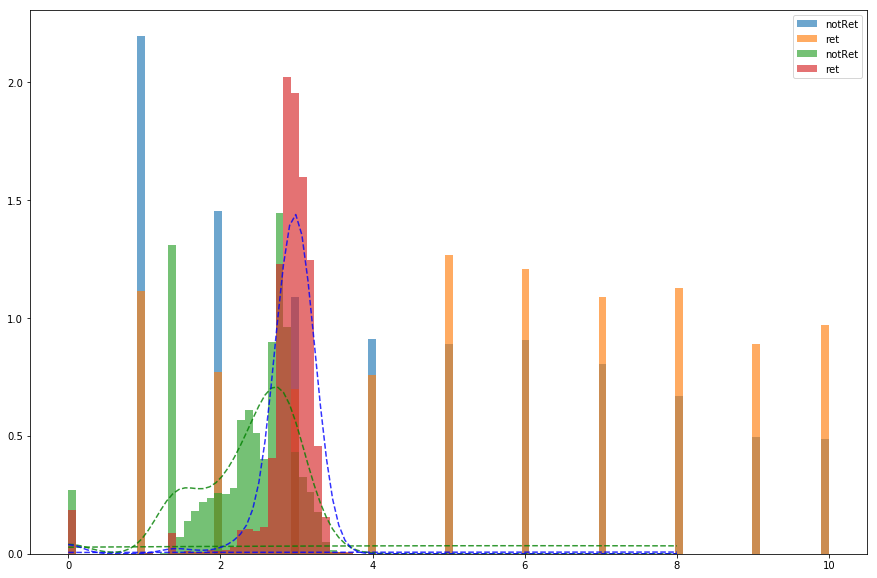

In [8]:
x_train = pd.read_csv('x_train.csv',sep=';')
y_train = pd.read_csv('y_train.csv',sep=';',names=['value'])
plt.figure(figsize=(15,10))
data = Data(x_train,y_train)
data.plot_hist(3,bins=np.linspace(0,10,100),x=np.linspace(0,8,100))
data_log = data.log_x()
data_log.plot_hist(3,bins=np.linspace(0,10,100),x=np.linspace(0,8,100))

In [ ]:
import seaborn
print data_side.X
seaborn.pairplot(pd.DataFrame(data_side.X))

[[ 3.68887945  2.39789527  2.89037176 ..., -0.18596511 -0.31018867
   1.01995513]
 [ 3.09104245  3.13549422  4.02535169 ...,  0.73770604  0.65878427
   0.12765415]
 [ 1.79175947  1.94591015  1.94591015 ..., -0.49385549 -0.48625112
  -0.66550227]
 ..., 
 [ 1.94591015  2.07944154  2.30258509 ..., -0.4168829  -0.37560734 -0.61593   ]
 [ 4.02535169  0.69314718  0.69314718 ..., -0.87871847 -0.93042863
   1.81311155]
 [ 0.69314718  1.09861229  1.09861229 ..., -0.80174588 -0.70524831
  -0.86379138]]


In [100]:
#dropping 5 and 7
MLP = MLPClassifier(hidden_layer_sizes=(25,1))
a = np.delete(range(12),[1,8,10])

print "MLP without 1,8,10:"
_,_,s1 =test_alg_cv(MLP,X=data.X[:,a])
print "MLP with full"
_,_,s2 =test_alg_cv(MLP)
print "delta:",s1-s2


print "Forest without 1,8,10:"
_,_,s1=test_alg_cv(Forest,X = data.X[:,a])
print "Forest with full"
_,_,s2=test_alg_cv(Forest)
print "delta:",s1-s2



MLP without 5 and 7:
result: 0.384647668862 std:0.00901532192572
MLP with full
result: 0.384876504612 std:0.00907458514774
delta: -0.000228835750727
Forest without 5 and 7:
result: 0.388216562467 std:0.00824320942359
Forest with full
result: 0.389502070799 std:0.00831486219927
delta: -0.00128550833231


plot for fractionOfUsefullBoosters


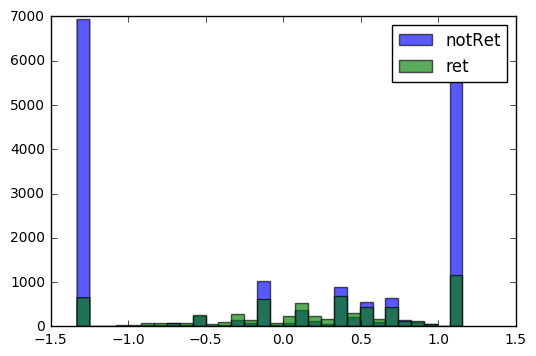

In [81]:
data.plot_hist(7)

In [20]:
#Universal testing function
def test_alg(algo,X=data.X,y=data.y,test_size = 0.2,desc = True):  
        # X=X will use your global X defined above. 
        
    x_train_, x_test_, y_train_, y_test_ = sk.model_selection.train_test_split(X,y,test_size=test_size)
    #fitting the model
    algo.fit(x_train_,y_train_)
    y_pred = algo.predict_proba(x_test_)
    #return log loss
    metrics = sk.metrics.log_loss(y_test_,y_pred)
    s= "result: "+str(metrics)
    if desc:
        s = s+" \n\nAlgorithm info:\n"+str(algo)
    print s
    return algo

def scor_logloss(estimator,X,y):
    pr = estimator.predict_proba(X)
    return sk.metrics.log_loss(y,pr)

def test_alg_cv(algo,X=data.X,y=data.y,test_size = 0.2,desc = False,cv=5):  
    # X=X will use your global X defined above. 
    #return log loss
    cv_score = sk.model_selection.cross_val_score(algo,X,y,scoring=scor_logloss,cv=cv)
    s= "result: "+str(cv_score.mean())+" std:"+str(np.std(cv_score))
    if desc:
        s = s+" \n\nAlgorithm info:\n"+str(algo)
    print s
    return algo,cv_score,cv_score.mean()

In [102]:
clf,_,_=test_alg_cv(MLP)

result: 0.429043416413 std:0.0863041437605


In [101]:
x_test = pd.read_csv('x_test.csv',';')

x_test= data.scaler.transform(x_test)

y_res = MLP.predict_proba(x_test)

y_stay = pd.DataFrame(y_res[:,1])
y_stay.describe()

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.